## Detecção de bordas
***

Detectar bordas em uma imagem é um conceito importante e tem muitas aplicações. Detectar bordas pode nos ajudar a saber mais sobre a estrutura e o limite dos objetos em uma imagem. As bordas são definidas como partes de imagens onde há mudanças significativas nos valores  de  pixel  ao  atravessar  a imagem.  O  que  isso  significa? 

Digamos  que  estamos digitalizando  uma  imagem  da  esquerda  para  a  direita,  e  enquanto  examinamos  a  imagem, percebemos que o valor de pixel, do pixel anterior, é muito menor que o valor de pixel, do pixel atual. Isso implica que o pixel atual pode ser provavelmente um pixel de borda. Como vimos anteriormente, uma derivada de imagem é a maneira de encontrar a mudança nos valores de pixel e, portanto, pode ser uma maneira ingênua de encontrar bordas em uma imagem.

Usando uma derivada de imagem, podemos encontrar pixels onde há alteração nos valores de pixels entre  os  pixels  vizinhos  e  esse  pixel  provavelmente  será  parte  de  uma  borda.  Usar  apenas derivados  de  imagem  não  é  muito  robusto.  Imagens  com  muito  barulho (noise) produzirão muitas bordas falsas, o que reduzirá a qualidade geral do seu sistema de visão. Existem técnicas de  detecção  de  bordas  mais  sofisticadas,  como  os  detectores  de  borda  **Sobel  e  Canny**  que abordaremos agora e que são mais robustos e produzem menos resultados falsos.

![img](https://user-images.githubusercontent.com/14116020/64503710-a8cc3180-d2a2-11e9-8221-c906998b92f7.png)

O gradiente de imagem é um dos blocos de construção fundamentais no processamento de imagens de visão computacional. Usamos gradientes para detectar bordas em imagens, o que nos permite encontrar contornos de objetos em imagens. Nós os usamos como entradas para quantificar imagens através da extração de recursos -na verdade, descritores de imagem bem  sucedidos  e  bem  conhecidos,  como  Histograma  de  Gradientes  Orientados  e  SIFT,  são construídos com representações de gradiente de imagem. As imagens de gradiente são usadas para construir mapas de saliência, que destacam os assuntos de uma imagem.

Usamos gradientes o tempo todo em visão computacional e processamento de imagem. Podemos dizer que eles são um dos blocos de construção mais importantes e vamos discuti-los em detalhes antes de praticar com o OpenCV.

***
### Gradiente de Imagem
***

Os gradientes de imagem são usados como blocos de construção básicos em muitas aplicações  de  processamento  de  imagem  e  visão  computacional. No  entanto,  a  aplicação principal de gradientes de imagem é na detecção de borda.

Como o nome sugere, a detecção de bordas é o processo de encontrar bordas em uma imagem, o que revela informações estruturais sobre os objetos em uma imagem. As bordas podem, portanto, corresponder a:

* Limites de um objeto em uma imagem
* Limites de sombras ou condições de iluminação em uma imagem
* Limites de "partes" dentro de um objeto

Abaixo temos uma imagem com as bordas sendo detectadas:

![img](https://user-images.githubusercontent.com/14116020/64579210-6f55fd80-d358-11e9-8986-e1910b30e5fa.png)

À esquerda, temos nossa imagem de entrada original. À direita, temos nossa imagem com bordas detectadas - comumente chamado de mapa de bordas (edge map). A imagem à direita revela claramente a estrutura e o esboço dos objetos em uma imagem. Observe como o contorno  do rosto é claramente  revelado.  Usando  este  esboço,  podemos  então  aplicar contornos (Contours) para extrair os objetos reais da região ou quantificar as formas para que possamos  identificá-los  mais  tarde.  Assim  como  os  gradientes  de  imagem  são  blocos  de construção para métodos como a detecção de bordas, a detecção de bordas também é um bloco  de  construção  para  o  desenvolvimento  de  uma  aplicação  completa  de  visão computacional. Então, como podemos encontrar essas bordas em uma imagem? O primeiro passo é calcular o gradiente da imagem.

Formalmente, um gradiente de imagem é definido como uma mudança direcional na intensidade da imagem. Explicando: em cada pixel da imagem de entrada (escala de cinza), um gradiente mede a mudança na intensidade do pixel em uma determinada direção. Ao estimar a direção ou a orientação juntamente com a magnitude (ou seja, quão forte é a mudança de direção), podemos detectar regiões de uma imagem que se parecem com bordas.

Na  prática,  os  gradientes  de  imagem  são  estimados  usando  kernels  (conforme estudamos anteriormente), assim como fizemos usando alisamento (Smoothing) e desfocagem (Blurring)- mas desta vez estamos tentando encontrar os componentes estruturais da imagem. Nosso  objetivo  aqui  é  encontrar  a  mudança  de  direção  para  o  pixel  central  marcado  em vermelho na direção x e y:

![img](https://user-images.githubusercontent.com/14116020/64579322-e12e4700-d358-11e9-9d3b-8964c4858244.png)

No  entanto,  antes de  mergulhar  em  kernels  para  a  estimativa  de  gradiente,  vamos realmente passar pelo processo de computação do gradiente manualmente. O primeiro passo é simplesmente encontrar e marcar os pixels norte, sul, leste e oeste ao redor do pixel central.

Na imagem acima, examinamos a vizinhança 3x3 que circunda o pixel central (252). Nossos valores x correm da esquerda para a direita e nossos valores y de cima para baixo. Para calcular qualquer mudança de direção, precisaremos dos pixels norte, sul, leste e oeste, que são marcados na figura abaixo.

![img](https://user-images.githubusercontent.com/14116020/64579389-1fc40180-d359-11e9-9792-8b31f69b9364.png)

Se indicarmos a nossa imagem de entrada como I, então definimos os pixels norte, sul, leste e oeste usando a seguinte notação:

* **Norte**: $I(x, y - 1)$
* **Sul**: $I(x, y + 1)$
* **Leste**: $I(x + 1, y)$
* **Oeste**: $I(x - 1, y)$

Esses quatro valores são críticos no cálculo das mudanças na intensidade da imagem tanto na direção x quanto na y. Para demonstrar isso, vamos calcular a mudança vertical ou a alteração y tomando a diferença entre os pixels norte e sul:

$$G_y = I(x, y - 1) - I(x, y + 1)$$

Da mesma forma, podemos calcular a mudança horizontal ou a mudança x, tomando a diferença entre os pixels leste e oeste:

$$G_x = I(x + 1, y) - I(x - 1, y)$$

Agora temos $G_x$ e $G_y$, que representam a alteração na intensidade da imagem para o pixel central na direção x e y. Mas a grande questão é: o que fazemos com esses valores? Para responder  a  isso,  precisaremos  definir  dois  novos  termos - a  magnitude  do  gradiente  e  a orientação do gradiente.

A **magnitude do gradiente** é usada para medir quão forte é a mudança na intensidade da imagem. A magnitude do gradiente é um número de valor real que quantifica a "força" da mudança de intensidade.

A **orientação do gradiente** é  usada  para  determinar  em  que  direção  a  mudança  de intensidade  está  apontando.  Como  o  nome  sugere,  a  orientação  do  gradiente  nos  dará  um ângulo que podemos usar para quantificar a direção da mudança.

Por exemplo, veja a seguinte visualização da orientação do gradiente:

![img](https://user-images.githubusercontent.com/14116020/64579767-6108e100-d35a-11e9-839d-3f11cf63bf27.png)

À  esquerda,  temos  uma  região 3x3 de  uma  imagem  onde  a  metade  superior  da imagem  é  branca  e  a  metade  inferior  da  imagem  é  preta.  A  orientação  do  gradiente  é, portanto, 90º.

E  à  direita  temos  outra  vizinhança  3x3  de  uma  imagem,  onde  a  região  triangular superior é branca e a região triangular inferior é preta. Aqui podemos ver a mudança de direção é igual a 45º.

Intuitivamente,  as  mudanças  na  direção  fazem  sentido,  pois  podemos  realmente visualizar  o  resultado. Mas,  como realmente calculamos  a  magnitude  e  orientação  do gradiente? Vamos  ver  se  podemos  desmistificar  o  cálculo  da orientação e  da  magnitude. Comecemos com uma imagem 3x3:

![img](https://user-images.githubusercontent.com/14116020/64579847-b34a0200-d35a-11e9-9586-d18141c7debb.png)

Aqui podemos ver que o pixel central está marcado em vermelho. O próximo passo na determinação da orientação e da magnitude do gradiente é realmente calcular as mudanças no gradiente na direção x e y. Felizmente, já sabemos como fazer isso - eles são simplesmente os valores  $G_x$ e  $G_y$ que  calculamos  anteriormente! Usando $G_x$ e $G_y$,  podemos  aplicar  alguma trigonometria básica para calcular a magnitude e orientação do gradiente G:

![img](https://user-images.githubusercontent.com/14116020/64579901-e2607380-d35a-11e9-9479-d0c2f5a12dee.png)

Inspecionando  este  triângulo  você  pode  ver  que  a  magnitude  do  gradiente  G  é  a hipotenusa  do  triângulo.  Portanto,  tudo  o  que  precisamos  fazer  é  aplicar  o  teorema  de Pitágoras (lembra disso, das aulas de Matemática da sétima série, quando você se perguntava quando  usaria  isso  na  sua  vida?  Parece  que  o  momento  chegou) e  acabaremos  com  a magnitude do gradiente:

$$G = \sqrt{G_x^2 + G_y^2}$$

A  orientação  do  gradiente  pode  então  ser  dada  como  a  proporção  de  $G_y$ para  $G_x$. Tecnicamente, usamos o $tan^{-1}$ para calcular a orientação do gradiente, mas isso poderia levar a valores  indefinidos  e  então usaremos  a  função  arctan2  para  representar  os  diferentes quadrantes em vez disso:

$$\theta = arctan2(G_y, G_x) \times (\frac{180}{\pi})$$

A função arctan2 nos dá a orientação em radianos, que então convertemos em graus multiplicando pela proporção de $\frac{180}{\pi}$. Vamos prosseguir e calcular manualmente G e $\theta$ para que possamos ver como o processo éfeito:

![img](https://user-images.githubusercontent.com/14116020/64580161-b1347300-d35b-11e9-9358-4e5bac241910.png)

Na imagem acima, temos uma imagem onde o terço superior é branco e os dois terços inferiores são pretos. Usando as equações para $G_x$ e $G_y$, chegamos a:

$$G_x = 0 - 0 = 0 e G_y = 255 - 0 = 255$$

Conectando esses valores em nossa equação de magnitude de gradiente, obtemos:

$$G = \sqrt{0^2 + 255^2} = 255$$

Quanto à nossa orientação do gradiente, temos:

$$\theta = arctan2(255, 0) \times (\frac{180}{\pi}) = 90º$$

Com  certeza,  o  gradiente  do  pixel  central  está  apontando  como  verificado  pelo $\theta = 90º$. Não é tão difícil calcular a magnitude e a orientação do gradiente não é mesmo? Vamos fazer outro exemplo só por diversão:

![img](https://user-images.githubusercontent.com/14116020/64580305-3586f600-d35c-11e9-8c4d-7d974efd0da4.png)

Nesta imagem podemos ver que a região triangular inferior é branca, enquanto a região triangular superior é preto. Calculando $G_x$ e $G_y$ chegamos a:

$$G_x = 0 - 255 = -255 e G_y = 0 - 255 = -255$$

O que nos deixa com uma magnitude de gradiente de:

$$G = \sqrt{255^2 + 255^2} = 360.62$$

E uma orientação de gradiente de:

$$\theta = arctan2(-255, -255) \times (\frac{180}{\pi}) = -135º$$

Com  certeza,  nosso  gradiente  está  apontando  para  baixo  e  para  a  esquerda  em  um ângulo de -135º.

Claro, apenas calculamos nossa orientação e magnitude do gradiente para dois valores de pixel exclusivos: 0 e 255. Normalmente, você informaria a orientação e a magnitude em uma imagem em escala de cinza onde o intervalo de valores seria [0, 255].

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def show(img):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

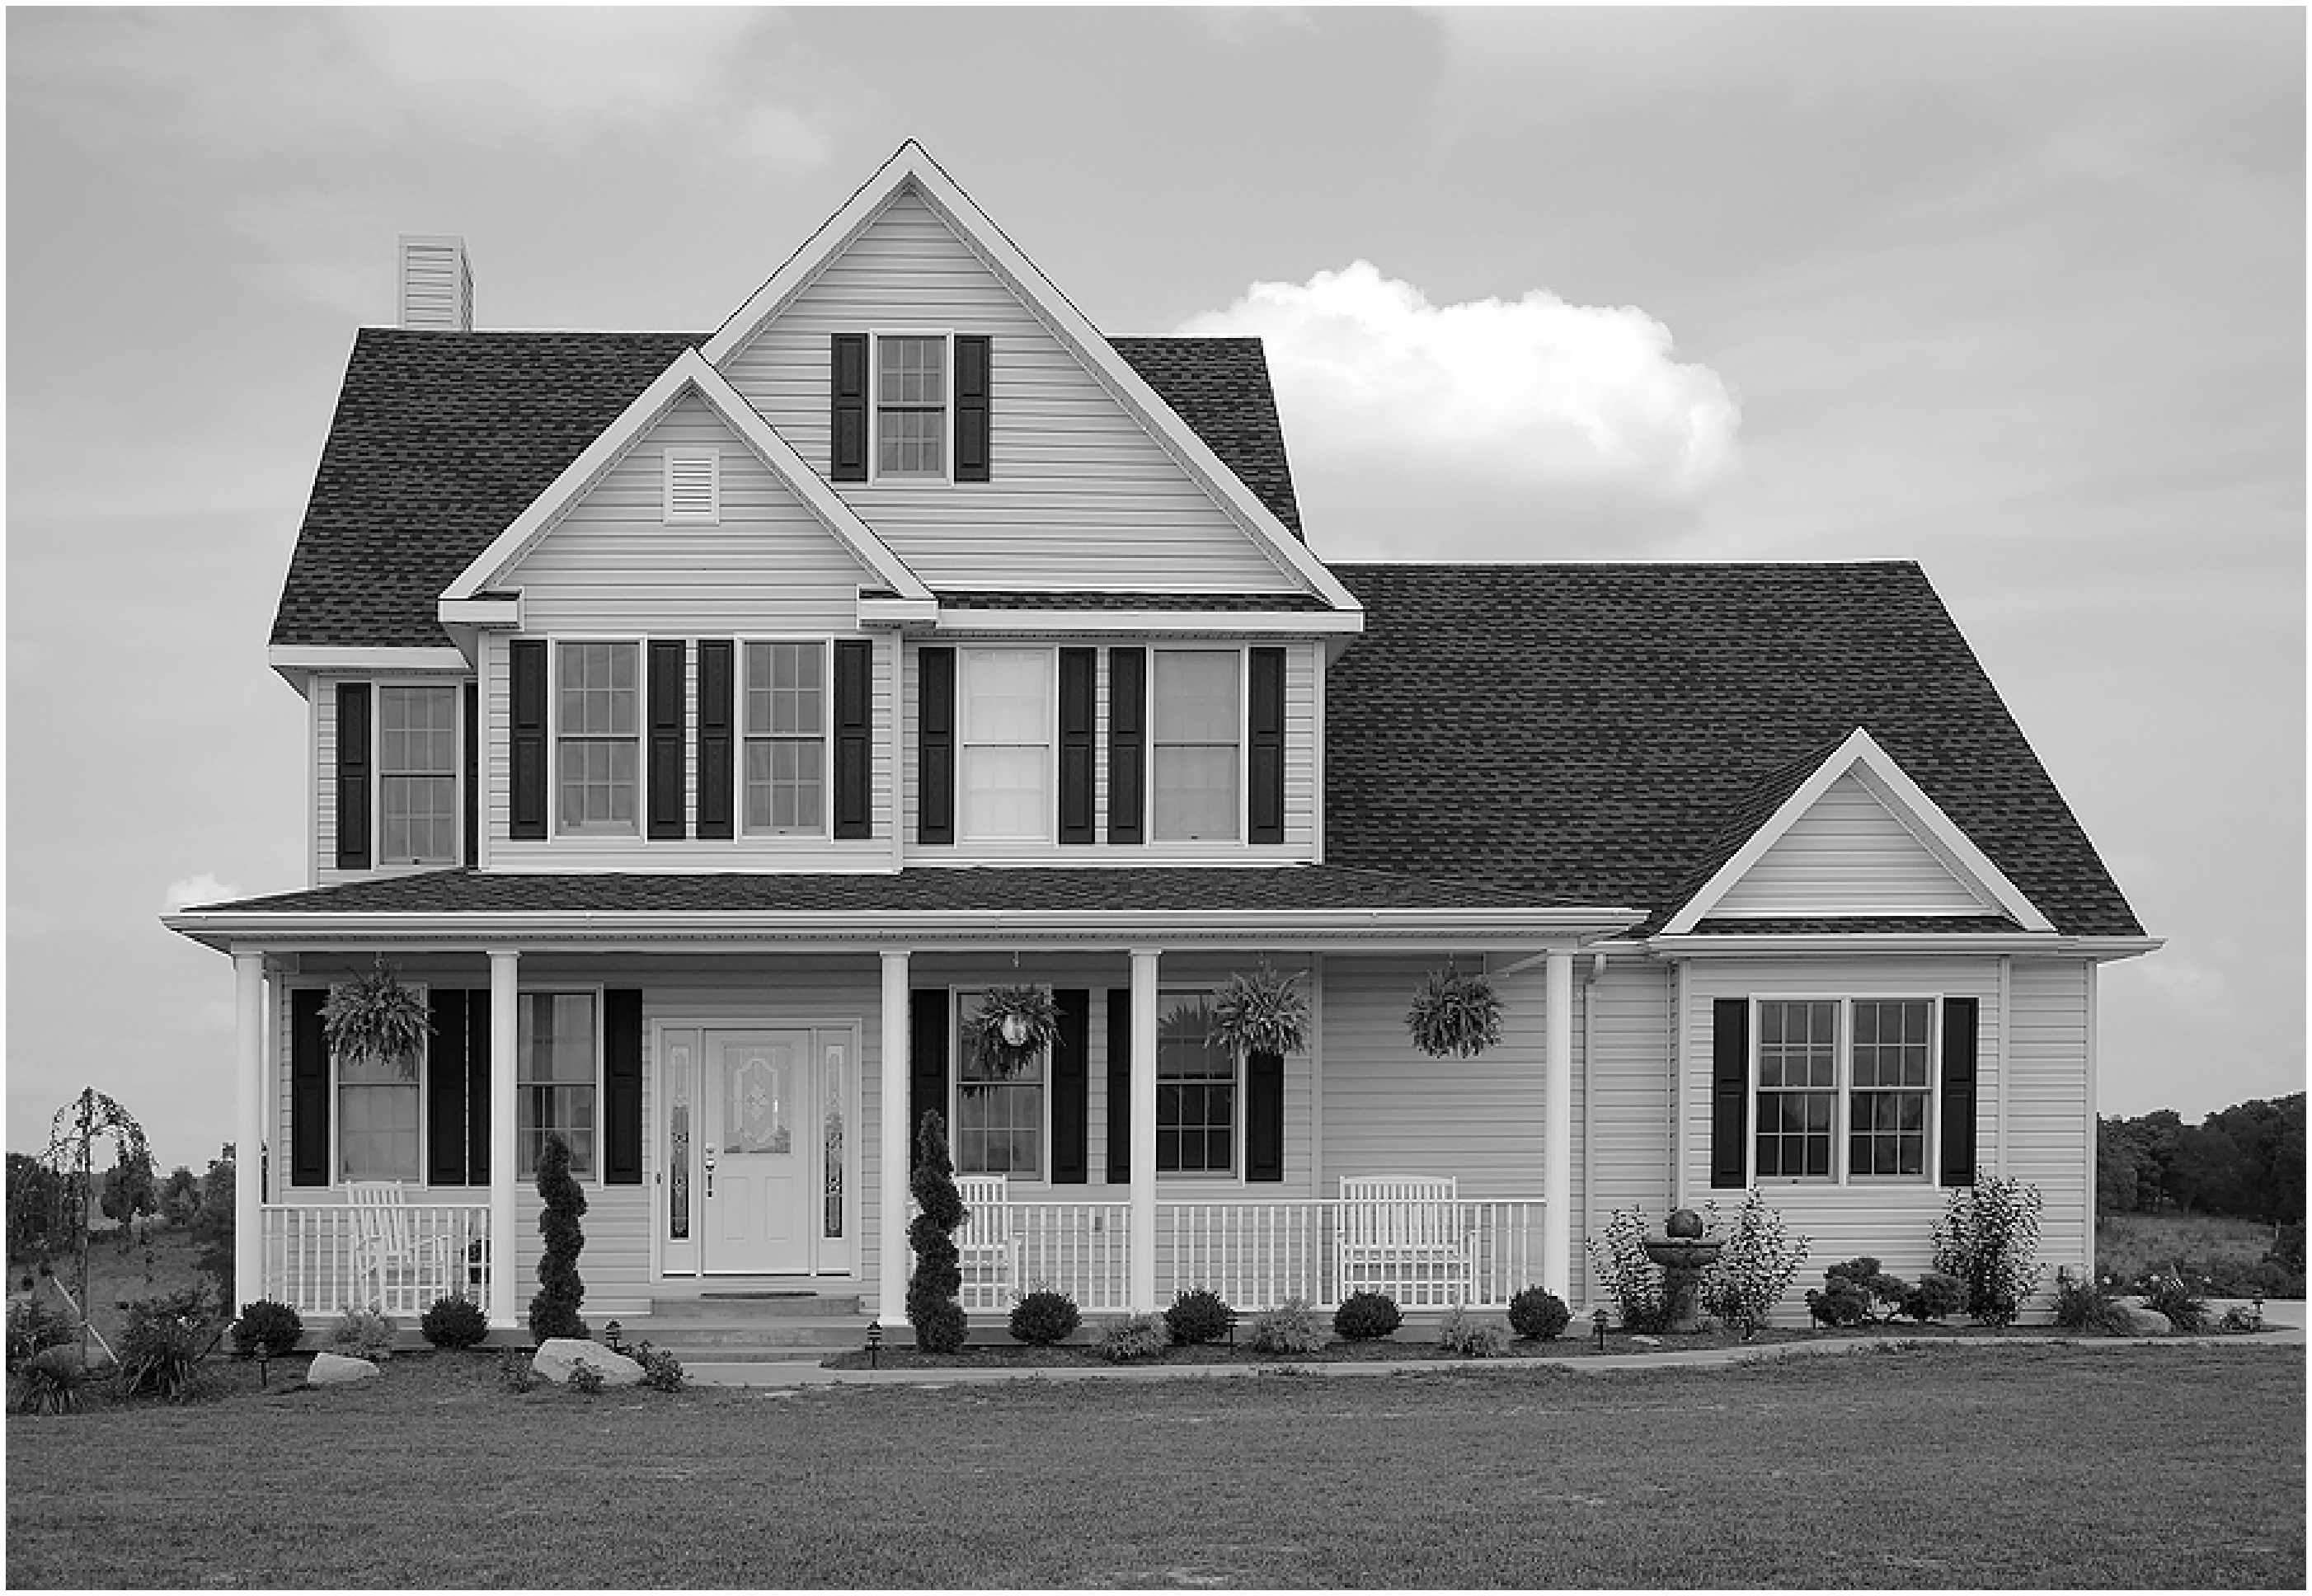

In [2]:
# Carrega a imagem e converte para escala de cinza
image = cv2.imread("imagens/casa.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

In [3]:
# Computando os gradientes nos eixos X e Y 
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

In [4]:
# Calcula a magnitude e a orientação do gradiente, respectivamente
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

In [5]:
# Encontra todos os pixels que estão dentro dos limites dos ângulos superior e inferior
idxs = np.where(orientation >= 175.0, orientation, -1)
idxs = np.where(orientation <= 180.0, idxs, -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255

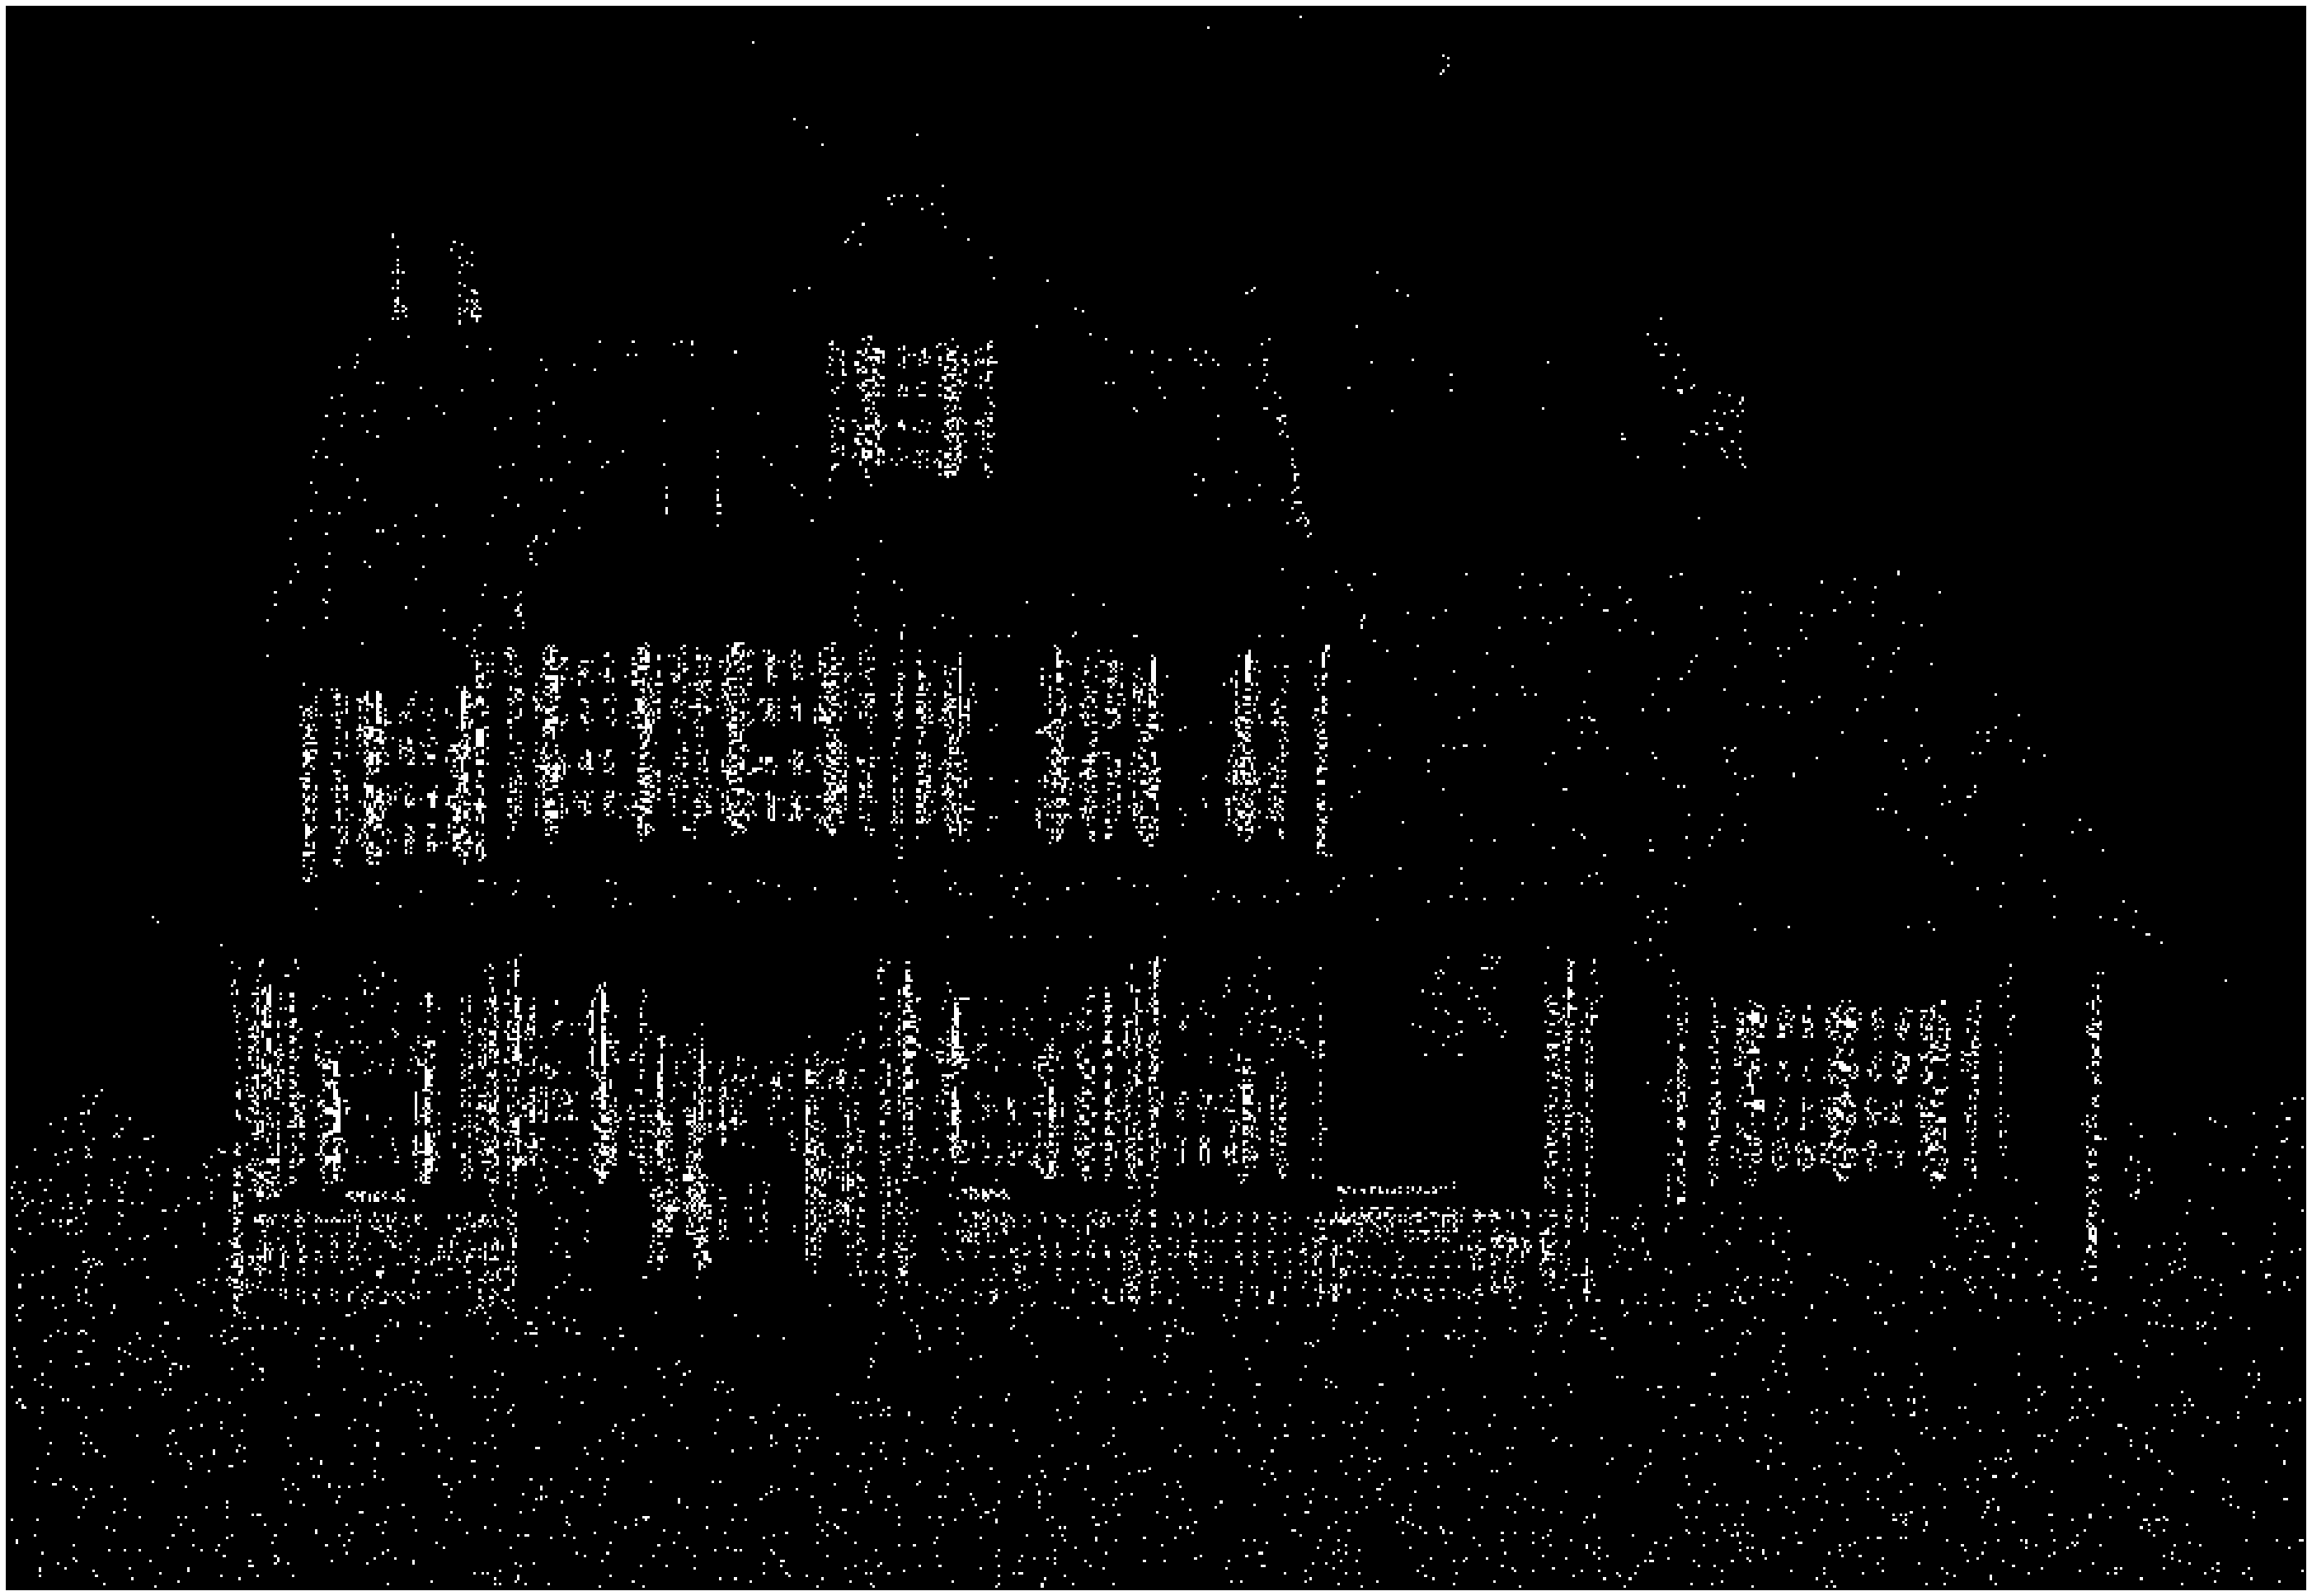

In [6]:
show(mask)

Esses pontinhos da imagem são pixels entre o limite inferior e superior, ou seja, tudo que tiver acima desses limites ou abaixo serão as bordas. Essa é a última etapa antes de encontrar as bordas. A próxima etapa é somar os gradientes de X e Y para detectar as bordas.